In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pip install geopandas
#pip install shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
#read spray csv
df = pd.read_csv('../assets/raw_datasets/spray.csv')
print('rows',df.shape[0],'column',df.shape[1])
df.head(3)

rows 14835 column 4


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [3]:
#check type
df.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [4]:
#check for null values
df.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [5]:
# Look at rows with null data
df[df.isna().any(axis=1)].head()

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


In [6]:
# Isolate dates with null values
set(df['Date'][df.isna().any(axis=1)])

{'2011-09-07'}

Looks like it is for only the date: 2011-09-07 that the Time was not recorded

In [7]:
# Look at the range of timing
time = df.Time.astype(str)
time_list = []
for i,s in enumerate(time):
    time_list.append(time[i][:time[i].find(':')]+time[i][time[i].find(' '):])
set(time_list)

{'10 AM', '10 PM', '11 PM', '12 AM', '6 PM', '7 PM', '8 PM', '9 PM', 'nan'}

The spray timing is between 6 pm -12 am and once at 10 am

As the other datasets do not have a time column this does not seems to be an important consideration and as such we shall drop the time column

In [8]:
df.drop('Time',axis=1,inplace=True)

In [9]:
#set date as index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#df.sort_index(inplace=True)

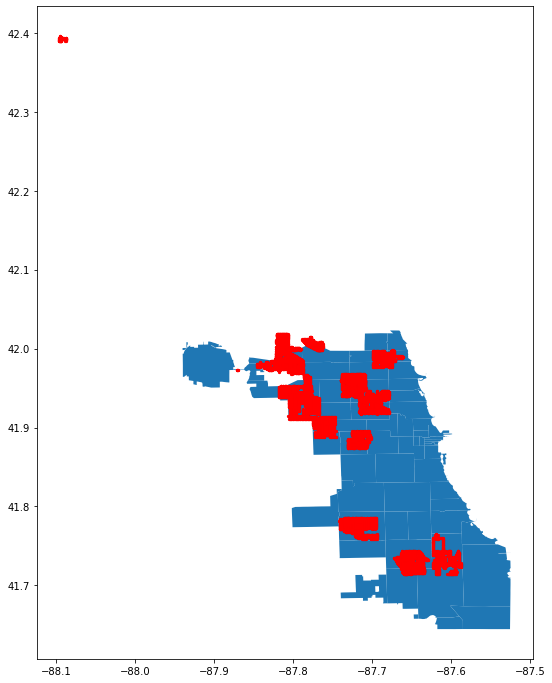

In [10]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)
#Map of chicago gotten from: https://catalog.data.gov/dataset/boundaries-zip-codes
chicago = gpd.read_file('../assets/raw_datasets/chicago - ZIP Codes.zip')
gdf.plot(ax=chicago.plot(figsize=(20, 12)), marker='o', color='red', markersize=5);

Looks like some of the sprayed areas recorded is outside of the city of chicago

Should we drop those locations?

In [11]:
#save cleaned spray dataframe
df.to_csv('../assets/cleaned_datasets/spray_c.csv')